In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
import statsmodels.api as sm
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

In [46]:
data = pd.read_csv("data/games_clean.csv")

In [220]:
data["FormattedReleaseDate"] = data["ReleaseDate"].map(lambda x: pd.to_datetime(x)) 
data["DayOfYear"] = data["FormattedReleaseDate"].dt.dayofyear
data["AverageHours"] = data["AveragePlaytime"].map(lambda x : x / 60)
data

,GameID,Name,ReleaseDate,Developer,Publisher,Platform,Genre,Tags,PositiveRatings,NegativeRatings,AveragePlaytime,Price,Description,Image,PercentageRating,FormattedReleaseDate,DayOfYear,AverageHours
0,0,counter-strike,2000-11-01,valve,valve,windows;mac;linux,action,action;fps;multiplayer,124534,3339,17612,7.19,Play the world's number 1 online action game. ...,https://steamcdn-a.akamaihd.net/steam/apps/10/...,0.973888,2000-11-01,306,293.533333
1,1,team fortress classic,1999-04-01,valve,valve,windows;mac;linux,action,action;fps;multiplayer,3318,633,277,3.99,One of the most popular online action games of...,https://steamcdn-a.akamaihd.net/steam/apps/20/...,0.839787,1999-04-01,91,4.616667
2,2,day of defeat,2003-05-01,valve,valve,windows;mac;linux,action,fps;world war ii;multiplayer,3416,398,187,3.99,Enlist in an intense brand of Axis vs. Allied ...,https://steamcdn-a.akamaihd.net/steam/apps/30/...,0.895648,2003-05-01,121,3.116667
3,3,deathmatch classic,2001-06-01,valve,valve,windows;mac;linux,action,action;fps;multiplayer,1273,267,258,3.99,Enjoy fast-paced multiplayer gaming with Death...,https://steamcdn-a.akamaihd.net/steam/apps/40/...,0.826623,2001-06-01,152,4.300000
4,4,half-life: opposing force,1999-11-01,gearbox software,valve,windows;mac;linux,action,fps;action;sci-fi,5250,288,624,3.99,Return to the Black Mesa Research Facility as ...,https://steamcdn-a.akamaihd.net/steam/apps/50/...,0.947996,1999-11-01,305,10.400000
5,5,ricochet,2000-11-01,valve,valve,windows;mac;linux,action,action;fps;multiplayer,2758,684,175,3.99,A futuristic action game that challenges your ...,https://steamcdn-a.akamaihd.net/steam/apps/60/...,0.801278,2000-11-01,306,2.916667
6,6,half-life,1998-11-08,valve,valve,windows;mac;linux,action,fps;classic;action,27755,1100,1300,7.19,Named Game of the Year by over 50 publications...,https://steamcdn-a.akamaihd.net/steam/apps/70/...,0.961878,1998-11-08,312,21.666667
7,7,counter-strike: condition zero,2004-03-01,valve,valve,windows;mac;linux,action,action;fps;multiplayer,12120,1439,427,7.19,"With its extensive Tour of Duty campaign, a ne...",https://steamcdn-a.akamaihd.net/steam/apps/80/...,0.893871,2004-03-01,61,7.116667
8,8,half-life: blue shift,2001-06-01,gearbox software,valve,windows;mac;linux,action,fps;action;sci-fi,3822,420,361,3.99,Made by Gearbox Software and originally releas...,https://steamcdn-a.akamaihd.net/steam/apps/130...,0.900990,2001-06-01,152,6.016667
9,9,half-life 2,2004-11-16,valve,valve,windows;mac;linux,action,fps;action;sci-fi,67902,2419,691,7.19,1998. HALF-LIFE sends a shock through the game...,https://steamcdn-a.akamaihd.net/steam/apps/220...,0.965601,2004-11-16,321,11.516667


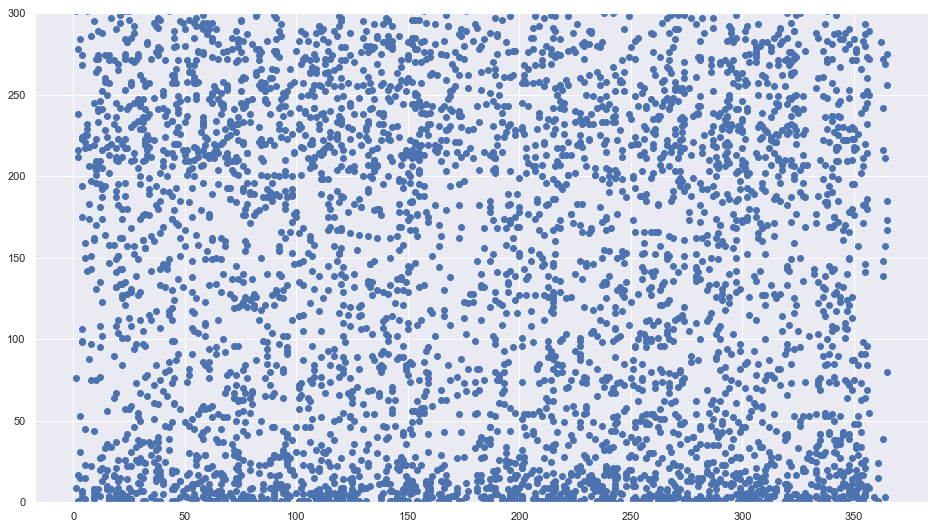

In [195]:
x1 = data["DayOfYear"]
y = data["AveragePlaytime"]
fig, ax = plt.subplots()
plt.scatter(x1,y)
#plt.xlim(1, 366)
plt.ylim(0, 300)
#plt.xlabel("Price", fontsize=20)
#plt.ylabel("Percent Rating", fontsize=20)
#plt.xticks(np.arange(min(x1), 366, 10))
#plt.yticks(np.arange(min(y), max(y)+0.05, 0.05))
plt.rcParams["figure.figsize"] = [16,9]
plt.show()

In [137]:
x = sm.add_constant(x1)
result = sm.GLSAR(y,x).fit()
result.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                           GLSAR Regression Results                           
==============================================================================
Dep. Variable:        AveragePlaytime   R-squared:                       0.000
Model:                          GLSAR   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.1928
Date:                Thu, 05 Sep 2019   Prob (F-statistic):              0.661
Time:                        04:11:57   Log-Likelihood:                -59069.
No. Observations:                6122   AIC:                         1.181e+05
Df Residuals:                    6120   BIC:                         1.182e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        609.6426     98.578      6.184      0.000     416.394     802.891
DayOfYear      0.2048      0.466      0.439      0.661      -0.709       1.119
==============================================================================
Omnibus:                    15912.351   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        396030849.524
Skew:                          29.762   Prob(JB):                         0.00
Kurtosis:                    1247.593   Cond. No.                         435.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

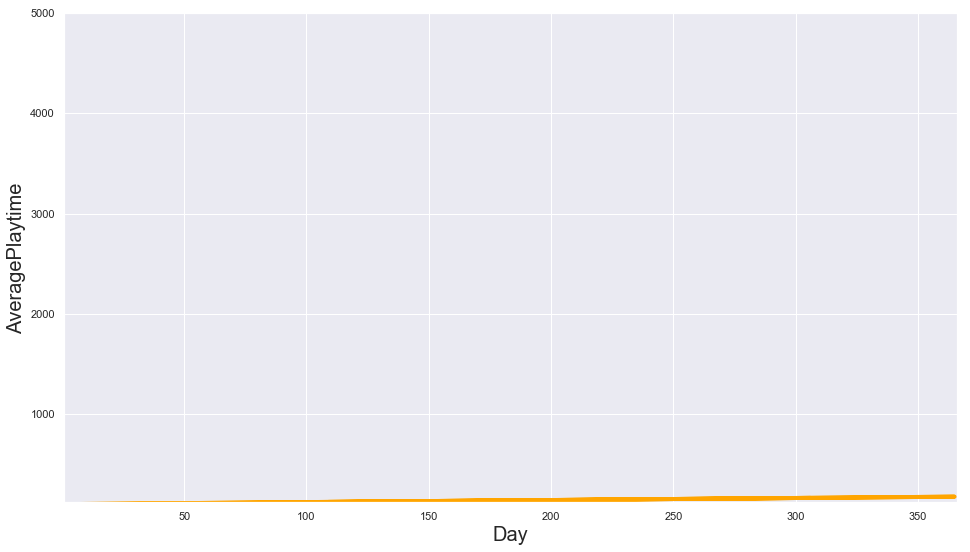

In [138]:
x1 = data["DayOfYear"]
yhat =  0.2048 * x1 + 609/6
fig = plt.plot(x1,yhat, lw=4, c = 'orange', label="regression line")
plt.xlim(1, 366)
plt.ylim(120, 5000)
plt.xlabel("Day", fontsize=20)
plt.ylabel("AveragePlaytime", fontsize=20)
plt.show()

In [221]:
x = data.iloc[:, [17,16]]

In [222]:
x

,AverageHours,DayOfYear
0,293.533333,306
1,4.616667,91
2,3.116667,121
3,4.300000,152
4,10.400000,305
5,2.916667,306
6,21.666667,312
7,7.116667,61
8,6.016667,152
9,11.516667,321


In [250]:
kmeans = KMeans(10)

In [251]:
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [252]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([4, 9, 9, ..., 9, 9, 9])

In [253]:
data_with_clusters = data.copy()
data_with_clusters["Cluster"] = identified_clusters
data_with_clusters

,GameID,Name,ReleaseDate,Developer,Publisher,Platform,Genre,Tags,PositiveRatings,NegativeRatings,AveragePlaytime,Price,Description,Image,PercentageRating,FormattedReleaseDate,DayOfYear,AverageHours,Cluster
0,0,counter-strike,2000-11-01,valve,valve,windows;mac;linux,action,action;fps;multiplayer,124534,3339,17612,7.19,Play the world's number 1 online action game. ...,https://steamcdn-a.akamaihd.net/steam/apps/10/...,0.973888,2000-11-01,306,293.533333,4
1,1,team fortress classic,1999-04-01,valve,valve,windows;mac;linux,action,action;fps;multiplayer,3318,633,277,3.99,One of the most popular online action games of...,https://steamcdn-a.akamaihd.net/steam/apps/20/...,0.839787,1999-04-01,91,4.616667,9
2,2,day of defeat,2003-05-01,valve,valve,windows;mac;linux,action,fps;world war ii;multiplayer,3416,398,187,3.99,Enlist in an intense brand of Axis vs. Allied ...,https://steamcdn-a.akamaihd.net/steam/apps/30/...,0.895648,2003-05-01,121,3.116667,9
3,3,deathmatch classic,2001-06-01,valve,valve,windows;mac;linux,action,action;fps;multiplayer,1273,267,258,3.99,Enjoy fast-paced multiplayer gaming with Death...,https://steamcdn-a.akamaihd.net/steam/apps/40/...,0.826623,2001-06-01,152,4.300000,3
4,4,half-life: opposing force,1999-11-01,gearbox software,valve,windows;mac;linux,action,fps;action;sci-fi,5250,288,624,3.99,Return to the Black Mesa Research Facility as ...,https://steamcdn-a.akamaihd.net/steam/apps/50/...,0.947996,1999-11-01,305,10.400000,6
5,5,ricochet,2000-11-01,valve,valve,windows;mac;linux,action,action;fps;multiplayer,2758,684,175,3.99,A futuristic action game that challenges your ...,https://steamcdn-a.akamaihd.net/steam/apps/60/...,0.801278,2000-11-01,306,2.916667,6
6,6,half-life,1998-11-08,valve,valve,windows;mac;linux,action,fps;classic;action,27755,1100,1300,7.19,Named Game of the Year by over 50 publications...,https://steamcdn-a.akamaihd.net/steam/apps/70/...,0.961878,1998-11-08,312,21.666667,6
7,7,counter-strike: condition zero,2004-03-01,valve,valve,windows;mac;linux,action,action;fps;multiplayer,12120,1439,427,7.19,"With its extensive Tour of Duty campaign, a ne...",https://steamcdn-a.akamaihd.net/steam/apps/80/...,0.893871,2004-03-01,61,7.116667,0
8,8,half-life: blue shift,2001-06-01,gearbox software,valve,windows;mac;linux,action,fps;action;sci-fi,3822,420,361,3.99,Made by Gearbox Software and originally releas...,https://steamcdn-a.akamaihd.net/steam/apps/130...,0.900990,2001-06-01,152,6.016667,3
9,9,half-life 2,2004-11-16,valve,valve,windows;mac;linux,action,fps;action;sci-fi,67902,2419,691,7.19,1998. HALF-LIFE sends a shock through the game...,https://steamcdn-a.akamaihd.net/steam/apps/220...,0.965601,2004-11-16,321,11.516667,6


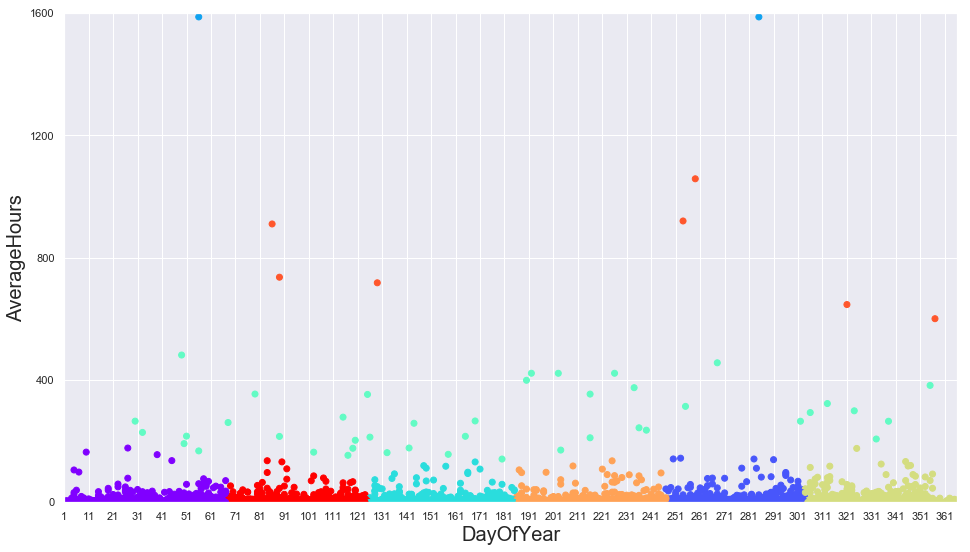

In [256]:
x1 = data_with_clusters["DayOfYear"]
y = data_with_clusters["AverageHours"]
fig, ax = plt.subplots()
plt.scatter(x1,y, c=data_with_clusters["Cluster"], cmap="rainbow")
plt.xlim(1, 366)
plt.ylim(0, 1600)
plt.xlabel("DayOfYear", fontsize=20)
plt.ylabel("AverageHours", fontsize=20)
plt.xticks(np.arange(min(x1), 366, 10))
plt.yticks(np.arange(min(y), 2000, 400))
plt.rcParams["figure.figsize"] = [16,9]
plt.show()

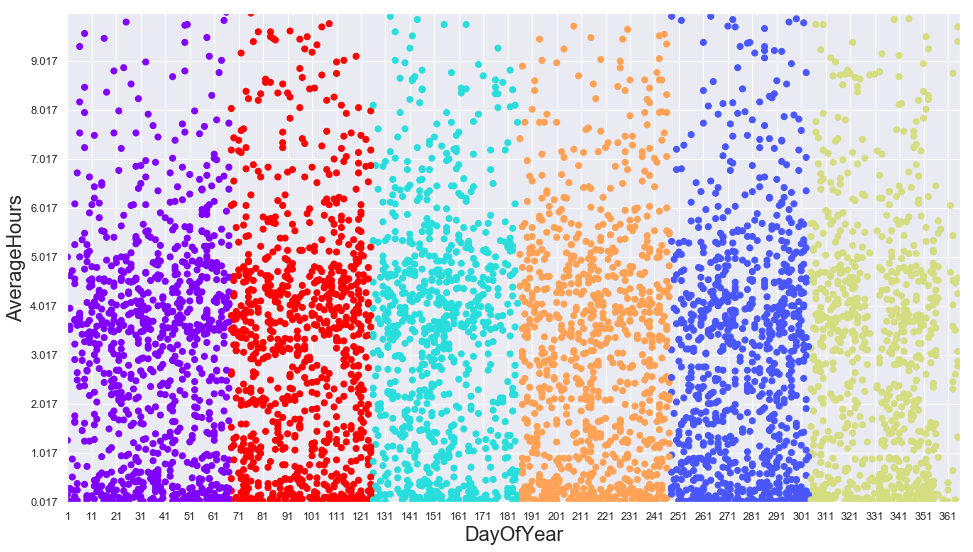

In [260]:
x1 = data_with_clusters["DayOfYear"]
y = data_with_clusters["AverageHours"]
fig, ax = plt.subplots()
plt.scatter(x1,y, c=data_with_clusters["Cluster"], cmap="rainbow")
plt.xlim(1, 366)
plt.ylim(0, 10)
plt.xlabel("DayOfYear", fontsize=20)
plt.ylabel("AverageHours", fontsize=20)
plt.xticks(np.arange(min(x1), 366, 10))
plt.yticks(np.arange(min(y), 10, 1))
plt.rcParams["figure.figsize"] = [16,9]
plt.show()